<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import networkx as nx
import pandas as pd
import numpy as np

from src.friend_network import FriendNetwork

In [2]:
ffn = FriendNetwork()

In [3]:
ffn.load_network("data/network_corrected.json")
ffn.filter_biggest_component()

In [ ]:
# ffn.draw_graph()
# ffn.draw_graph(node_scores=nx.degree_centrality(ffn.graph))
# ffn.draw_graph(node_scores=nx.closeness_centrality(ffn.graph))
# ffn.draw_graph(node_scores=nx.harmonic_centrality(ffn.graph))
# ffn.draw_graph(node_scores=nx.betweenness_centrality(ffn.graph))
# ffn.draw_graph(node_scores=nx.eigenvector_centrality(ffn.graph))


<AxesSubplot:>

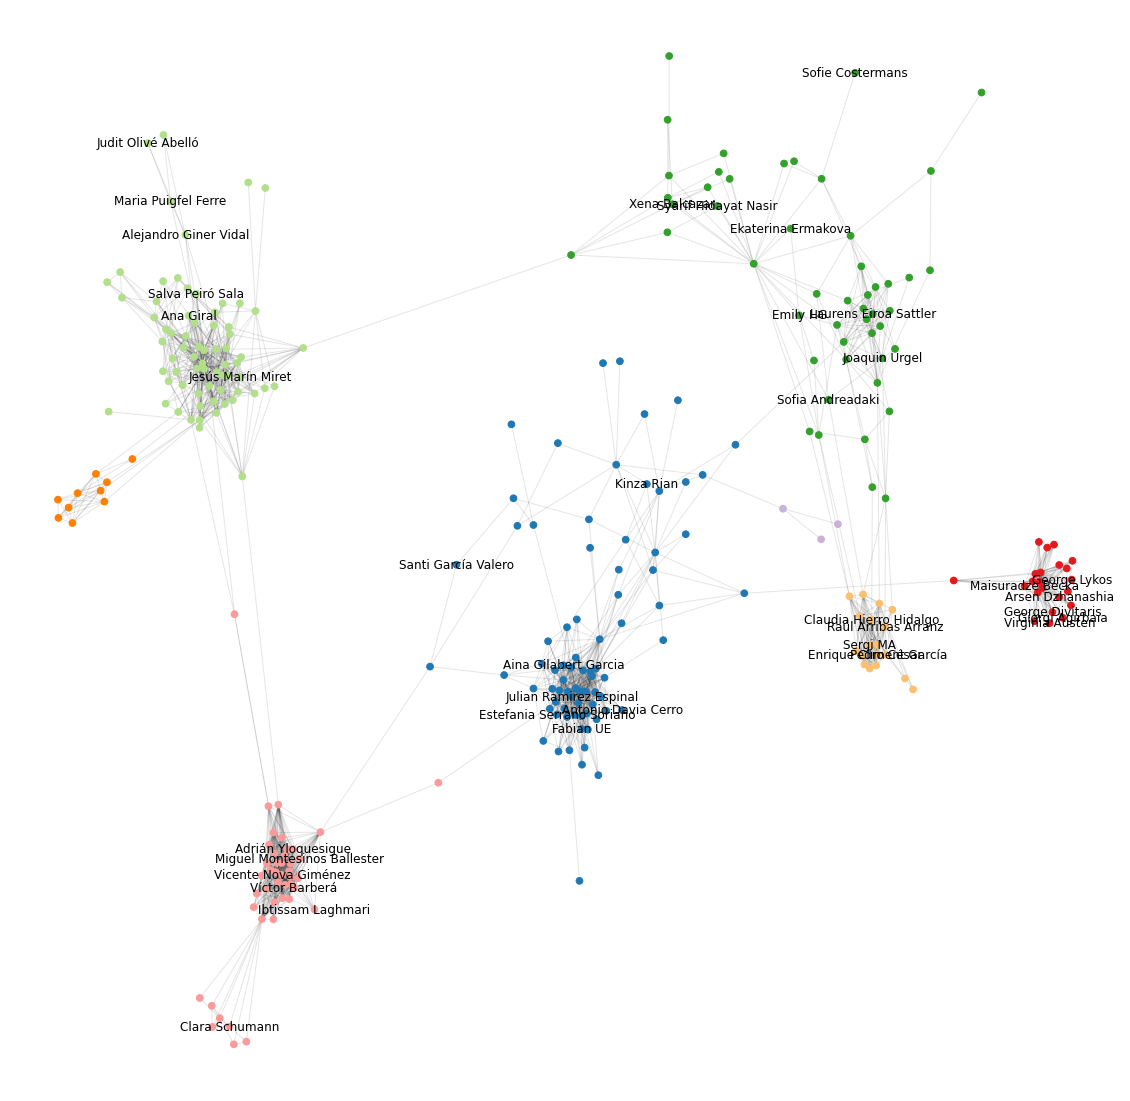

In [10]:
communities = nx.algorithms.community.greedy_modularity_communities(ffn.graph)
ffn.draw_graph(node_communities=communities)

In [12]:
len(communities)

8

In [ ]:
ffn.draw_graph(node_communities=list(nx.algorithms.community.kclique.k_clique_communities(ffn.graph, 4)))

<AxesSubplot:>

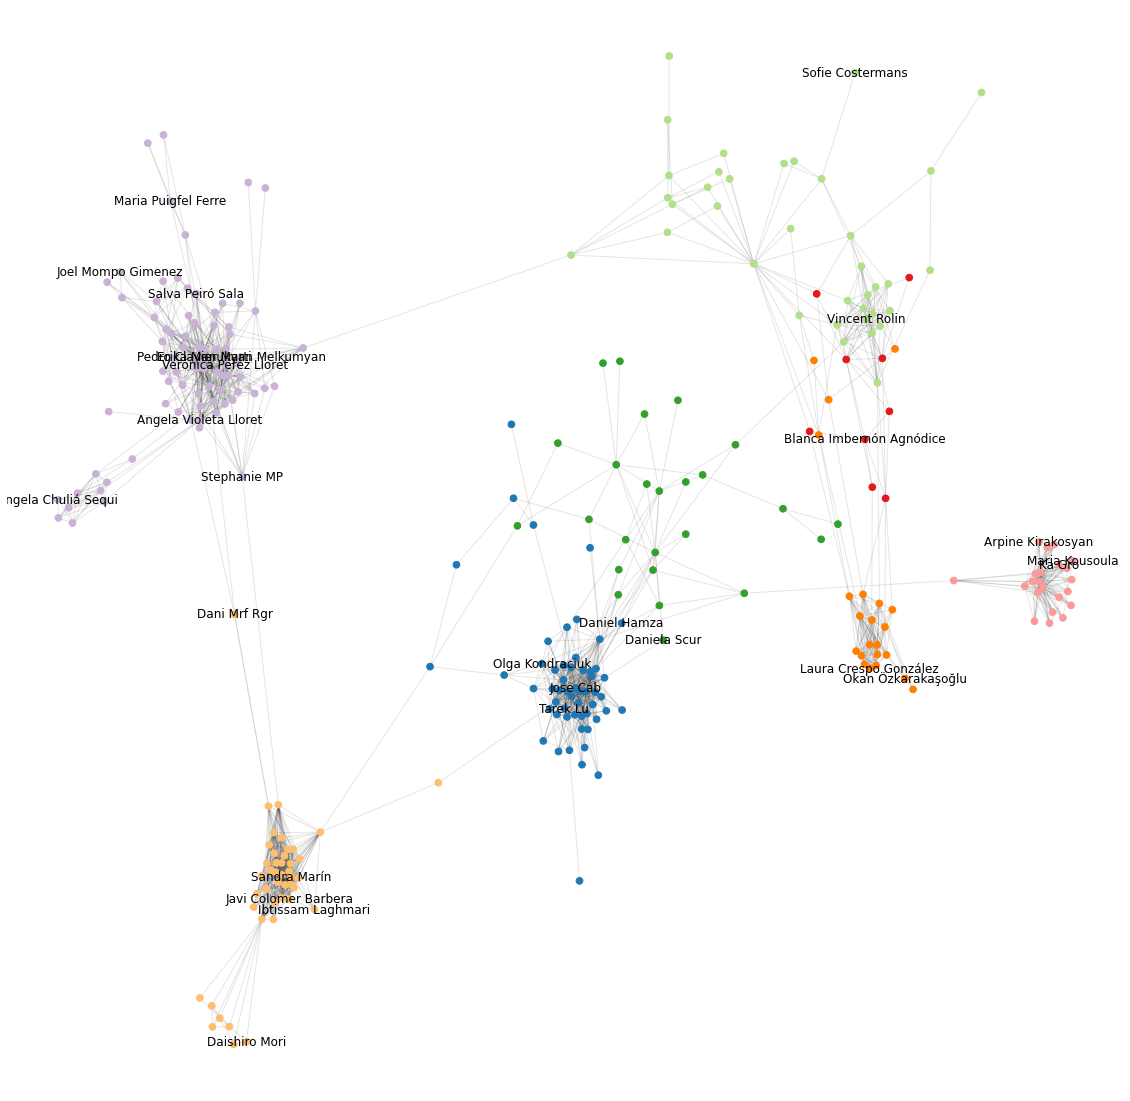

In [14]:
ffn.draw_graph(node_communities=list(nx.algorithms.community.asyn_fluid.asyn_fluidc(ffn.graph, 8, max_iter=1000)))

In [32]:
import itertools
communities_different_k = nx.algorithms.community.centrality.girvan_newman(ffn.graph)
k = 10
communities_by_k = []
for communities in itertools.islice(communities_different_k, k):
    communities_by_k.append(communities)

In [41]:
communities = []

for community in communities_by_k[-1]:
    communities.append(
        [ffn.friends.filter(user_id=person).name for person in community]
    )
        

In [44]:
ffn.get_person_friend_names(name="Francesca Monaco")

['Anna Sánchez González',
 'Belén EG',
 'Emily HG',
 'Frederik Hjorth Graungaard',
 'Naren Agarwal',
 'Pedro Martín Mayoral']

<AxesSubplot:>

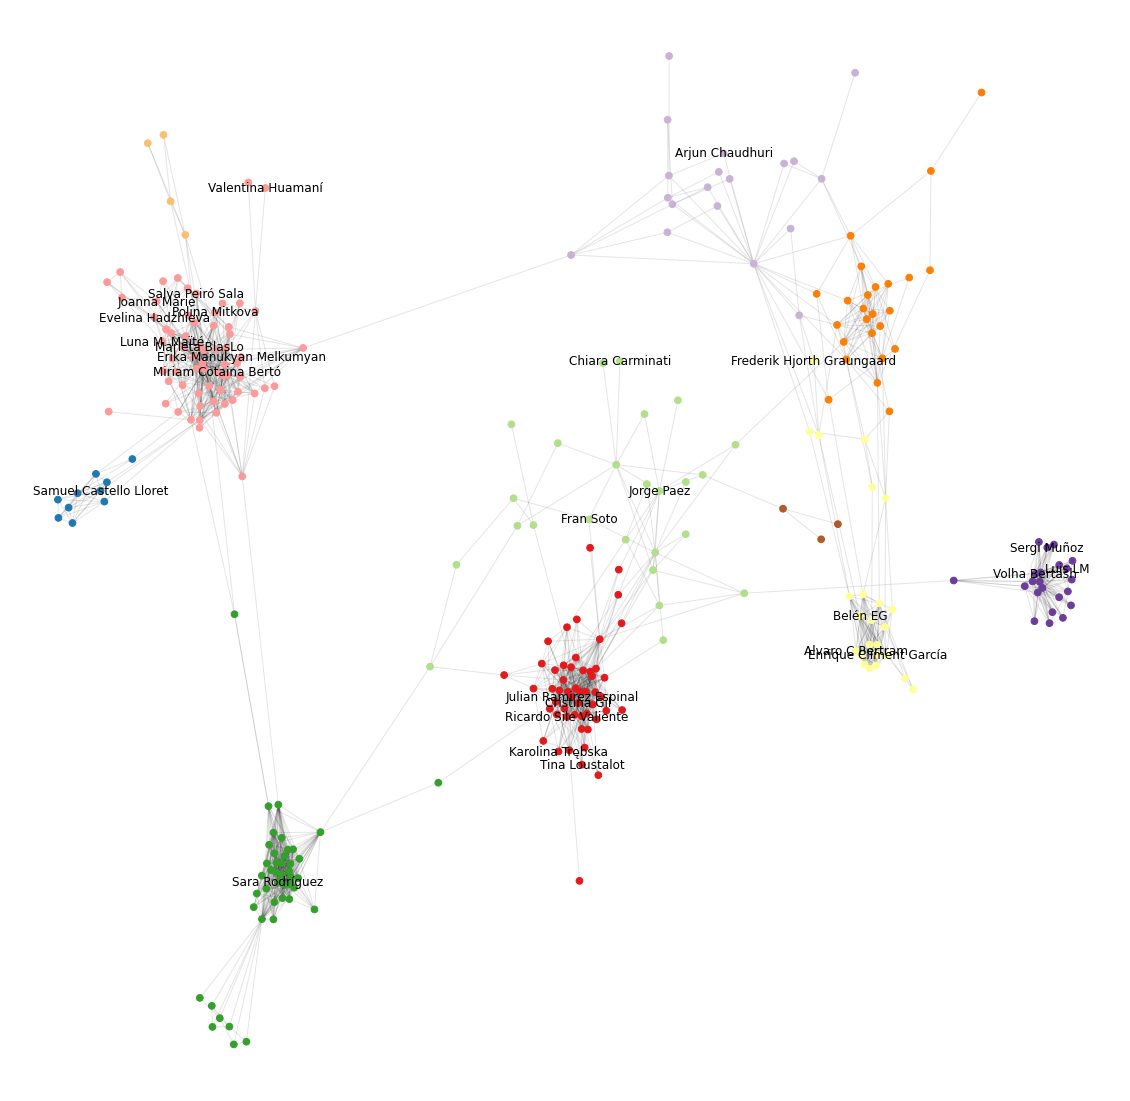

In [36]:
ffn.draw_graph(node_communities=communities_by_k[9])